In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
l = 5461*10**(-10)

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df

,m,z
0,0,9.2
1,1,6.1
2,2,7.4
3,3,8.0
4,4,8.2
5,5,8.3


In [5]:
df['z_n'] = df.apply(lambda col: col[0] - col)['z']

In [6]:
df['2ksi'] = 2*np.sqrt(df['z_n']/100*(df['m']+1)*l)

In [7]:
df['n'] = df['m'] + 1

In [8]:
df

,m,z,z_n,2ksi,n
0,0,9.2,0.0,0.000000,1
1,1,6.1,3.1,0.000368,2
2,2,7.4,1.8,0.000343,3
3,3,8.0,1.2,0.000324,4
4,4,8.2,1.0,0.000330,5
5,5,8.3,0.9,0.000343,6


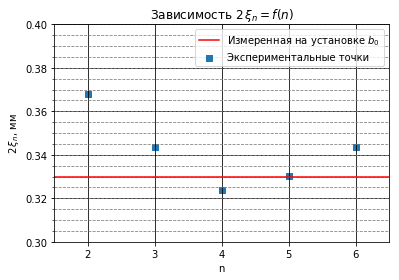

In [9]:
fig, ax = plt.subplots()
ax.scatter(df['n'][1:], df['2ksi'][1:]*10**(3), marker='s', label=r'Экспериментальные точки')
ax.plot(np.linspace(1.5, 6.5, 100), [0.33]*100, c='r', label=r'Измеренная на установке $b_0$')

ax.set_ylim((3*10**(-1), 4*10**(-1)))
ax.set_xlim((1.5, 6.5))
#ax.ticklabel_format(style='sci', scilimits=(0, 0))
ax.set_xlabel(r'n')
ax.set_ylabel(r'$2\,\xi_n$, мм')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(10**(-1)*0.2))
ax.yaxis.set_minor_locator(MultipleLocator(10**(-1)*0.05))
ax.grid(which='major', c='black')
ax.grid(which='minor', c='grey', linestyle='--')
ax.legend()
ax.set_title(r'Зависимость $2\, \xi_n = f(n)$')
fig.savefig('out.pdf')